In [15]:
import gmaps
import gmaps.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from scipy.stats import linregress
from scipy import stats
from config import api_key_census
import requests
import json
from config import gkey

In [16]:
## Open clean data files
pop_ready= pd.read_csv('HH_PopAllYear_Clean_NN.csv')
grouped_regions=pd.read_csv('HH_PopAllYear_Regions_Clean_NN.csv')

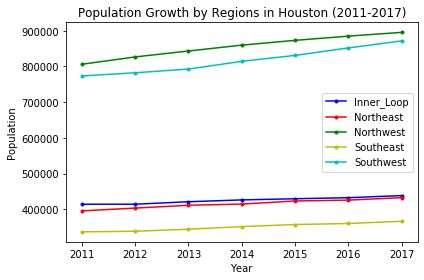

In [17]:
## Line chart population growth
plt.title("Population Growth by Regions in Houston (2011-2017)")
plt.xlabel("Year")
plt.ylabel("Population")

plt.plot(pop_ready.Year, pop_ready.Inner_Loop,"b.-",label="Inner_Loop")
plt.plot(pop_ready.Year, pop_ready.Northeast,"r.-",label="Northeast")
plt.plot(pop_ready.Year, pop_ready.Northwest,"g.-",label="Northwest")
plt.plot(pop_ready.Year, pop_ready.Southeast,"y.-",label="Southeast")
plt.plot(pop_ready.Year, pop_ready.Southwest,"c.-",label="Southwest")

plt.legend(loc="best")
plt.tight_layout()
plt.savefig("Graph_Population_Growth_Regions_Houston_SI.png")
plt.show()

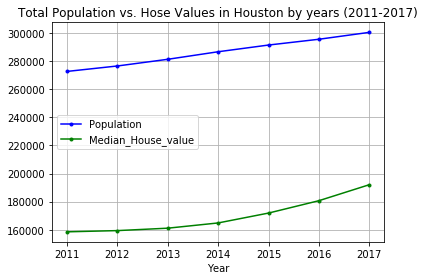

In [18]:
#plotting a line graph regarding total population growth and hause value increse

population_data = grouped_regions.iloc[5]
population_data = population_data.astype(float)
median_price_data = grouped_median_val["Houston_Total"]
t_test = {
    "Year": ["2011","2012","2013","2014","2015","2016","2017"],
    "Population": [2727340,2766106,2813715,2867421,2915175,2956347,3005392],
    "Median_House_Value": [158512,159382,161109,164837,171866,180674,192039]
}
              
ttest_data = pd.DataFrame(t_test)
plt.title("Total Population vs. Hose Values in Houston by years (2011-2017)")
plt.xlabel("Year")

plt.plot(ttest_data.Year, ttest_data.Population/10,"b.-",label="Population")
plt.plot(ttest_data.Year, ttest_data.Median_House_Value,"g.-",label="Median_House_value")

plt.legend(loc="upper left", bbox_to_anchor=(0,0.6))
plt.tight_layout()
plt.grid()
plt.tight_layout()
plt.savefig("Graph_Line_Pop_And_Values_SI.png")
plt.show()

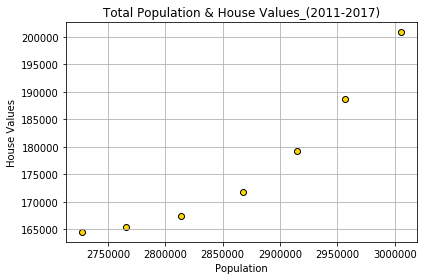

In [19]:
## scatter plot a line graph regarding total population growth and hause value increse
grouped_new = {
    "Year": ["2011","2012","2013","2014","2015","2016","2017"],
    "Inner_Loop": [246929,249129,257767,267142,284000,298143,318614],
    "Northeast": [89140,87413,86447,84693,87627,89987,93953],
    "Northwest": [140519,139733,140071,143329,149433,159238,170867],
    "Southeast": [113138,114223,113500,114369,115762,119246,123677],
    "Southwest": [202833,206410,207762,214652,222510,236757,253086,],
    "Houston_Total": [164535,165491,167495,171691,179242,188668,200806]
}
               
grouped_median_val = pd.DataFrame(grouped_new)

x = pop_ready["Houston_Total"];
y = grouped_median_val["Houston_Total"];

#s = grouped_median_val.Houston_Total
plt.title("Total Population & House Values_(2011-2017)")
plt.xlabel("Population")
plt.ylabel("House Values")
plt.grid()
plt.scatter(x, y, marker="o", facecolors="gold", edgecolors="black")
plt.tight_layout()
plt.savefig("Graph_Scatters_Pop_And_ValuesHouston_SI.png")

In [20]:
## Heat map coding
target_city=["Houston", "North Houston", "Kingwood", "Huffman", "Hufsmith", "Humble","Spring", "Tomball", "Bellaire", "Cypress", "Alief", "Barker","Hockley", "Katy", "Waller", "Pasadena", "Baytown", "Channelview", "Crosby", "Deer Park", "Galena Park", "Highlands", "La Porte", "Seabrook", "South Houston", "Webster"]
statess=['Texas','Texas','Texas','Texas','Texas','Texas','Texas','Texas','Texas','Texas','Texas','Texas','Texas','Texas','Texas','Texas','Texas','Texas','Texas','Texas','Texas','Texas','Texas','Texas','Texas','Texas']
cities_pd=pd.DataFrame()
cities_pd['City']=target_city
cities_pd['State']= statess
cities_pd["Lat"] = ""
cities_pd["Lng"] = ""

params = {"key": gkey}
for index, row in cities_pd.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    city = row['City']
    state = row['State']
    params['address'] = f"{city},{state}"

    cities_lat_lng = requests.get(base_url, params=params)
    
    cities_lat_lng = cities_lat_lng.json()

    cities_pd.loc[index, "Lat"] = cities_lat_lng["results"][0]["geometry"]["location"]["lat"]
    cities_pd.loc[index, "Lng"] = cities_lat_lng["results"][0]["geometry"]["location"]["lng"]
    
#cities_pd=cities_pd.drop([0,1,24])
cities_pd=cities_pd.rename(columns={'City':'Cities'})
cities_pd

,Cities,State,Lat,Lng
0,Houston,Texas,29.7604,-95.3698
1,North Houston,Texas,29.9196,-95.5171
2,Kingwood,Texas,30.05,-95.1845
3,Huffman,Texas,30.026,-95.0843
4,Hufsmith,Texas,30.1222,-95.5966
5,Humble,Texas,29.9988,-95.2622
6,Spring,Texas,30.0799,-95.4172
7,Tomball,Texas,30.0972,-95.6161
8,Bellaire,Texas,29.7058,-95.4588
9,Cypress,Texas,29.9717,-95.6938


In [21]:
# Heat map coding
pop_pd1= pd.read_csv('C:\workspace\Resources\HH_Pop2017_Raw_NN.csv',index_col=0)
pop_pd=pop_pd1.reset_index()
pop_pd["Zipcode"] = pop_pd.Zipcode.astype(float)
bins = [77000, 77299, 77315, 77325, 77336, 77337, 77338, 77345, 77347, 77373, 77377, 77391, 77396, 77402, 77410, 77411, 77413, 77433, 77447, 77450, 77484, 77493, 77508, 77522, 77530, 77532, 77536, 77547, 77562, 77572, 77586, 77587, 77598]
group_names = ["Houston", "North Houston", "Kingwood", "Huffman", "Hufsmith", "Humble", "Kingwood2", "Humble2", "Spring", "Tomball", "Spring2", "Humble3", "Bellaire", "Cypress", "Alief", "Barker", "Cypress2", "Hockley", "Katy", "Waller", "Katy2", "Pasadena", "Baytown", "Channelview", "Crosby", "Deer Park", "Galena Park", "Highlands", "La Porte", "Seabrook", "South Houston", "Webster"]
pop_pd["Cities"] = pd.cut(pop_pd["Zipcode"], bins, labels = group_names)
grouped = pop_pd.groupby(["Cities"])
pop2018 = grouped.sum()
pop2018.sort_values("2017", ascending=False)
merged_allyears=pop2018.reset_index()
merged_allyears.drop([1,2,4,13,14,15],axis=0,inplace=True)
merged_allyears.set_index('Cities',inplace=True)
merged_allyears.loc['Humble']=merged_allyears.loc['Humble']+merged_allyears.loc['Humble2']+merged_allyears.loc['Humble3']
merged_allyears.loc['Spring']=merged_allyears.loc['Spring']+merged_allyears.loc['Spring2']
merged_allyears.loc['Katy']=merged_allyears.loc['Katy']+merged_allyears.loc['Katy2']

merged_allyears=merged_allyears.drop('Humble2')
merged_allyears=merged_allyears.drop('Humble3')
merged_allyears=merged_allyears.drop('Spring2')
merged_allyears=merged_allyears.drop('Katy2')

merged_allyears=merged_allyears.rename(index={'Kingwood2':'Kingwood', "Cypress2":"Cypress"}).reset_index()

pop_arrange = {
    "Year": ["2011","2012","2013","2014","2015","2016","2017"],
    "Houston": [2842163,2883057,2930055,2983497,3030859,3073737,3124010],
    "Huffman": [12345,12116,12022,11699,12044,11806,12397],
    "Humble": [125731,130236,134815,141209,146670,150215,157920],
    "Kingwood": [64777,66561,68079,69975,69257,70872,70493],
    "Spring": [183367,189619,193242,196267,204598,211706,214205],
    "Tomball": [66228,70084,72710,75287,78852,82164,87283],
    "Bellaire": [17452,17522,17874,18130,18510,18667,19062],
    "Cypress": [115434,122639,129876,136761,144028,150801,161407],
    "Hockley": [11941,12555,13542,13186,13616,15417,15246],
    "Katy": [177337,182916,189781,197296,206434,213796,223819],
    "Waller": [10630,10921,10898,11370,11512,10716,10710],
    "Pasadena": [144184,144644,146162,146939,147442,148895,150504],
    "Baytown": [84032,86459,88141,91019,92339,93863,93819],
    "Channelview": [31322,30853,30368,30475,30175,30635,31119],
    "Crosby": [24270,26356,27208,28394,28430,29224,28320],
    "Deer Park": [30588,30891,31295,31960,32531,32182,32392],
    "Galena Park": [9798,9975,9782,9957,10027,9999,10077],
    "Highlands": [10456,10861,10751,10720,10591,10490,10665],
    "La Porte": [35975,35787,36116,36580,36865,37031,37374],
    "Seabrook": [20955,21563,22044,22114,22550,22280,22182],
    "South Houston": [16515,16648,16734,17052,16868,16862,16901],
    "Webster": [23461,24074,23738,24538,23877,24309,24689]
              }
              
pop_ready = pd.DataFrame(pop_arrange)
pop2017=pop_ready.loc[pop_ready['Year']=='2017',:]
pop2017.values.tolist()
merged_allyears=merged_allyears[['Cities','2017']]
merged_allyears['Cities']

merge_table = pd.merge(cities_pd, merged_allyears, on="Cities", how="right")
heat_map=merge_table.rename(columns={'2017':'Population_2017'})
heat_map

,Cities,State,Lat,Lng,Population_2017
0,Houston,Texas,29.7604,-95.3698,3124010.0
1,Kingwood,Texas,30.05,-95.1845,70493.0
2,Huffman,Texas,30.026,-95.0843,12397.0
3,Humble,Texas,29.9988,-95.2622,157920.0
4,Spring,Texas,30.0799,-95.4172,214205.0
5,Tomball,Texas,30.0972,-95.6161,87283.0
6,Bellaire,Texas,29.7058,-95.4588,19062.0
7,Cypress,Texas,29.9717,-95.6938,161407.0
8,Hockley,Texas,30.0269,-95.8459,15246.0
9,Katy,Texas,29.7858,-95.8245,223819.0


In [22]:
gmaps.configure(api_key = gkey)
heat_map1 = heat_map[heat_map['Cities'] != 'Houston']
houston_coordinates = (29.75, -95.36)
fig = gmaps.figure(map_type="HYBRID", center=houston_coordinates, zoom_level=8)
heatmap_layer = gmaps.heatmap_layer(heat_map1[["Lat","Lng"]], weights=heat_map1["Population_2017"])
fig.add_layer(heatmap_layer)
heatmap_layer.point_radius = 25

fig

Figure(layout=FigureLayout(height='420px'))